## Pitney Bowes Data Challenge_Team 2 (Noni)

### Import Data and Check

In [1]:
import pandas as pd
import numpy as np
import datetime
from sklearn.model_selection import train_test_split

In [2]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


In [3]:
df = pd.read_csv("/Users/NONI/Desktop/SMOTE_dataset_without_Aggegation_OR_scaling.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62198 entries, 0 to 62197
Data columns (total 53 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         62198 non-null  int64  
 1   avg_time_charging_lag1             62198 non-null  float64
 2   avg_time_charging_lag2             62198 non-null  float64
 3   avg_time_charging_lag3             62198 non-null  float64
 4   charging_rate_lag3                 62198 non-null  float64
 5   avg_time_discharging_lag1          62198 non-null  float64
 6   avg_time_discharging_lag2          62198 non-null  float64
 7   avg_time_discharging_lag3          62198 non-null  float64
 8   discharging_rate_lag3              62198 non-null  float64
 9   charge_cycle_time_below_12         62198 non-null  bool   
 10  avg_time_charging_lag4             62198 non-null  float64
 11  avg_time_discharging_lag4          62198 non-null  flo

In [4]:
df.head()

,Unnamed: 0,avg_time_charging_lag1,avg_time_charging_lag2,avg_time_charging_lag3,charging_rate_lag3,avg_time_discharging_lag1,avg_time_discharging_lag2,avg_time_discharging_lag3,discharging_rate_lag3,charge_cycle_time_below_12,...,discharging_rate_lag6_median,discharging_rate_lag8_median,avg_time_charging_lag12_random,avg_time_discharging_lag12_random,avg_time_charging_lag13_random,avg_time_discharging_lag13_random,avg_time_charging_lag14_random,avg_time_discharging_lag14_random,Days,fail_7
0,0,5.12,41.11,6.56,0.086667,4.37,91.70,15.70,-1.163333,False,...,0.816667,-0.173333,5.01,4.70,4.93,3.10,5.03,4.91,543,0
1,1,36.60,5.16,6.23,0.136667,62.67,6.53,6.16,-0.066667,False,...,-3.063333,-0.103333,10.89,18.93,21.39,35.90,5.23,7.31,522,0
2,2,5.51,5.04,4.52,-0.460000,5.13,5.65,4.14,-2.643333,False,...,0.000000,0.216667,5.13,4.37,4.73,3.50,26.79,41.29,518,0
3,3,4.66,39.85,35.76,0.076667,3.93,76.37,60.86,-0.166667,False,...,-0.293333,-0.046667,4.71,3.82,13.27,18.62,4.97,4.16,548,0
4,4,5.10,43.24,4.63,0.040000,4.69,71.44,3.80,0.066667,True,...,-0.006667,-1.790000,5.28,5.16,25.10,47.76,21.62,37.29,566,0


In [5]:
# Covert to Datetime 
# Calculate days between LastRecord ~ DateDeployed

# df['LastRecord'] = pd.to_datetime(df['LastRecord'])
# df['Date Deployed'] = pd.to_datetime(df['Date Deployed'])

In [6]:
# Create a new column for the days

# df['days'] = df['LastRecord'] - df['Date Deployed']
# df['days'] = df['days'].dt.days.astype('int16')
# df['days']

In [7]:
# Check nums of rows and variables

nRow = df.shape[0]
nVar = df.shape[1]
print('nRow: %d' % nRow, 'nVar: %d' % nVar )

nRow: 62198 nVar: 53


In [8]:
# Remove non-related variables to SHAP value

df1 = df.drop(['Unnamed: 0'], axis = 1)
df1['charge_cycle_time_below_12']=df1['charge_cycle_time_below_12'].astype('category').cat.codes
df1['charge_cycle_time_below_12']

0        0
1        0
2        0
3        0
4        1
        ..
62193    1
62194    1
62195    1
62196    1
62197    1
Name: charge_cycle_time_below_12, Length: 62198, dtype: int8

In [9]:
# split our training and test sets

feature_col = list(df1.columns.difference(['fail_7']))
x=df1[feature_col]
y=df1['fail_7']

In [10]:
# split our train and test sets (8:2)

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.2, random_state = 42) 
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape) 

(49758, 51) (12440, 51) (49758,) (12440,)


### LightGBM (Ensemble Learning, Gradient Boosting)
#### other option; 
Gradient Boosting: XGBoost, CatBoost / Bagging: Random Forest

In [11]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [12]:
# from math import sqrt
# from sklearn.metrics import mean_squared_error

# # train data -> LightGBM model
# lgb_dtrain = lgb.Dataset(data = train_x, label = train_y) 
# lgb_param = {'max_depth': 10, # Tree depth
#             'learning_rate': 0.01, # Step Size
#             'n_estimators': 1000, # Number of trees
#             'objective': 'regression'} #Regression?

# # Train Model
# lgb_model = lgb.train(params = lgb_param, train_set = lgb_dtrain)
# # Model Prediction
# lgb_model_predict = lgb_model.predict(test_x)

# # Root Mean Square Error
# print("RMSE: {}".format(sqrt(mean_squared_error(lgb_model_predict, test_y)))) 
##########################################################################################


# Accuracy is good measure when the target variable class in the data are nearly balanced.
import lightgbm as lgb
from sklearn.metrics import accuracy_score

# train data -> LightGBM modeling
lgb_dtrain = lgb.Dataset(data = train_x, label = train_y) 
lgb_param = {"objective": "binary", "metric": "binary_logloss"} #Binary
lgb_model = lgb.train(lgb_param, lgb_dtrain)

y_pred = lgb_model.predict(test_x)

print("Test Accuracy Classification score: {}".format(accuracy_score(test_y, y_pred>0.5)))

[LightGBM] [Info] Number of positive: 24824, number of negative: 24934
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015796 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12650
[LightGBM] [Info] Number of data points in the train set: 49758, number of used features: 51
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.498895 -> initscore=-0.004421
[LightGBM] [Info] Start training from score -0.004421
Test Accuracy Classification score: 0.832395498392283


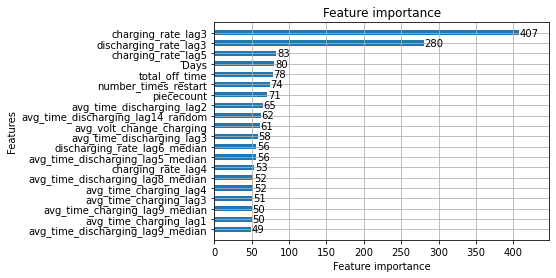

In [13]:
lgb.plot_importance(lgb_model, height=0.5, max_num_features=20)

### LightGBM & SHAP

In [14]:
import shap

# explain the model's predictions using SHAP values
explainer = shap.TreeExplainer(lgb_model)
shap_values = explainer.shap_values(test_x) 

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


In [15]:
# load JS visualization code to notebook
shap.initjs()

# visualize the first prediction's explaination with default colors in a force plot
#shap.force_plot(explainer.expected_value, shap_values[1,:], test_x.iloc[1,:])

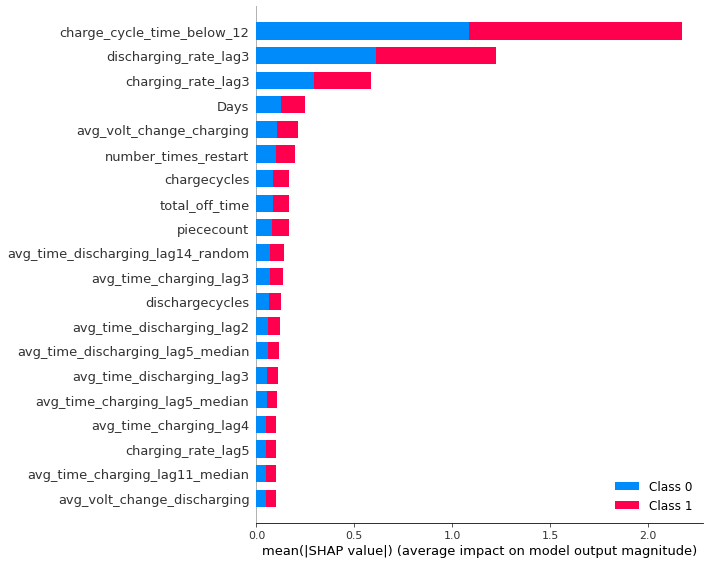

In [16]:
shap.summary_plot(shap_values, test_x, plot_type = "bar")

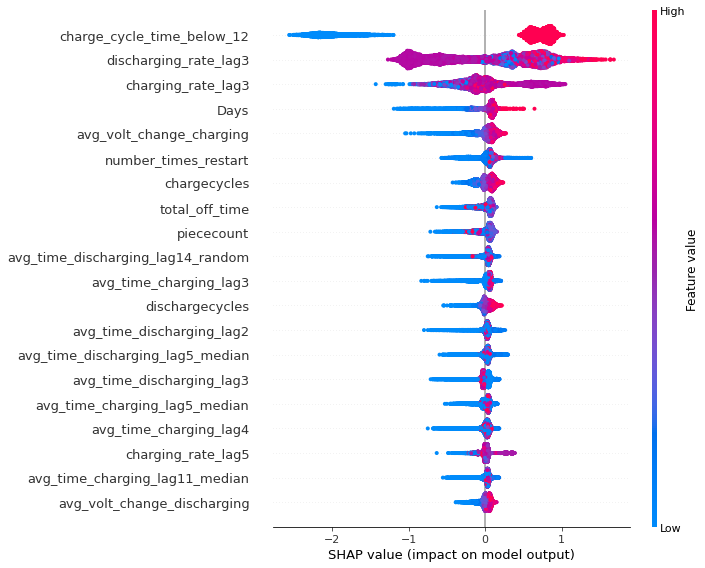

In [17]:
shap.summary_plot(shap_values[1], test_x, plot_type = "dot")

### Extra) Use Gradient Boosting Classifier & Feature Importance function

In [18]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(max_depth=2, subsample=0.8).fit(train_x, train_y)

gb_model.fit(train_x, train_y)

gb_pred=gb_model.predict(test_x)
gb_accuracy = accuracy_score(test_y, gb_pred>0.5)

In [19]:
print("train score: ", gb_model.score(train_x, train_y))
print("test score: ", gb_model.score(test_x, test_y))
print("GBM test accuracy score: ", gb_accuracy)

train score:  0.7841352144378794
test score:  0.7691318327974277
GBM test accuracy score:  0.7691318327974277


In [20]:
gb_model.feature_importances_

array([1.23340691e-02, 0.00000000e+00, 4.22123009e-03, 3.81235575e-03,
       2.81594780e-03, 7.56324521e-04, 3.28389287e-03, 0.00000000e+00,
       3.31750568e-03, 4.23625573e-03, 3.09430335e-03, 3.26091681e-03,
       2.28036565e-03, 1.84069698e-03, 1.62434085e-03, 3.34388515e-03,
       0.00000000e+00, 0.00000000e+00, 1.53125931e-03, 2.52353126e-03,
       3.48763044e-03, 7.67199319e-04, 7.76110496e-03, 3.84110655e-03,
       4.54942891e-03, 3.45937127e-03, 3.75270838e-03, 2.55061092e-03,
       2.21243015e-03, 3.55196609e-03, 4.26175110e-03, 3.45840374e-02,
       5.40538348e-03, 6.04821644e-01, 1.42059260e-03, 9.63359314e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.49474010e-04,
       1.29576709e-03, 2.13361150e-01, 0.00000000e+00, 0.00000000e+00,
       1.55693273e-04, 2.04486486e-04, 0.00000000e+00, 0.00000000e+00,
       1.46992122e-02, 5.67277814e-03, 1.41239990e-02])

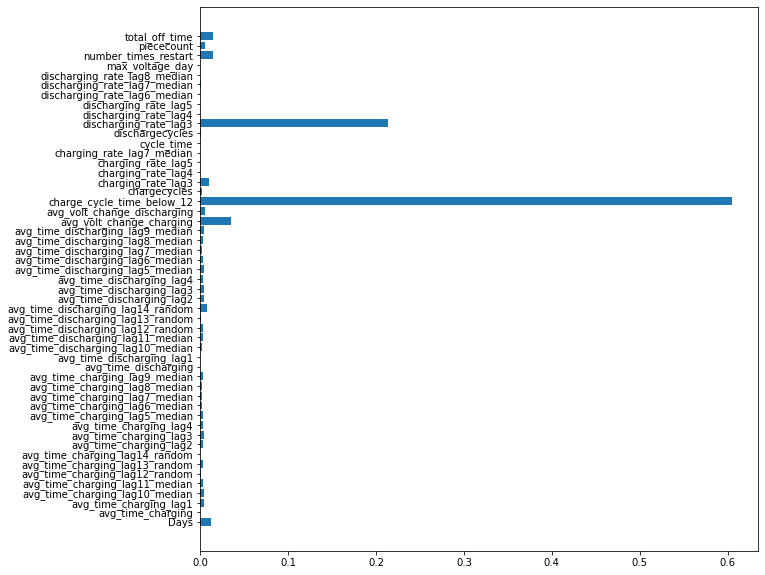

In [21]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,10))
def plot_feature_importance(model):
    n_feature= x.shape[1]    
    plt.barh(range(n_feature), model.feature_importances_, align="center")
    plt.yticks(np.arange(n_feature), x.columns)
    plt.show()

plot_feature_importance(gb_model)

### Extra) Use Decision Tree Classifier & SHAP

In [22]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [23]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

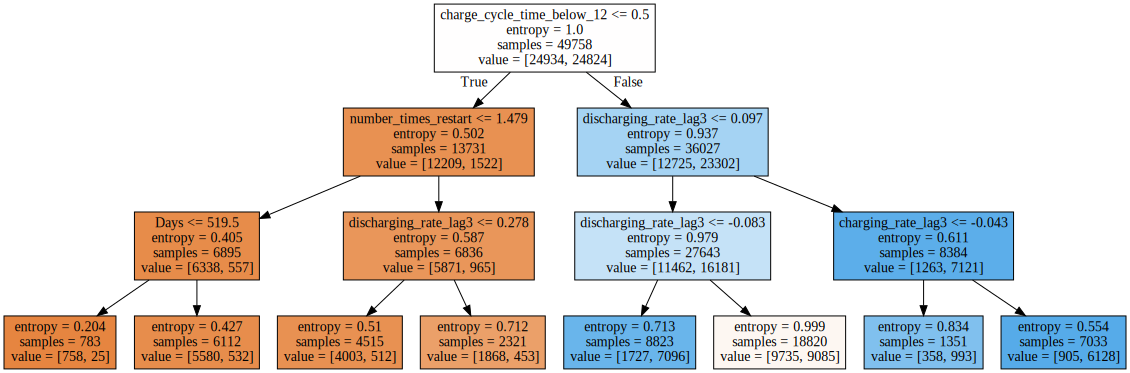

In [24]:
# develop a decision tree model
model = DecisionTreeClassifier(criterion = "entropy", max_depth = 3)
  
# train the model
model.fit(train_x, train_y)
# Visualize how model classified the entire data
tree_graph = export_graphviz(model, out_file=None, feature_names = x.columns, filled=True)
graphviz.Source(tree_graph) 

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


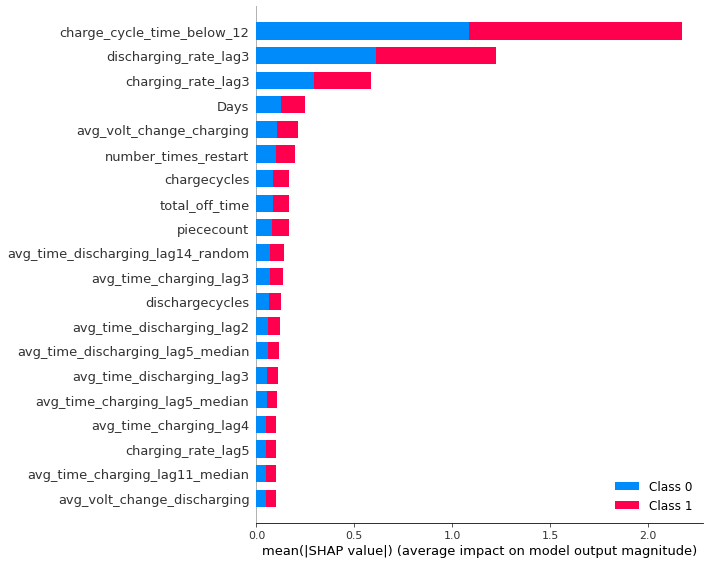

In [25]:
explainer1 = shap.TreeExplainer(model)
shap_values1 = explainer.shap_values(test_x)

shap.summary_plot(shap_values1, test_x, plot_type='bar')

In [26]:
pred_dt = model.predict(test_x)
accuracy_score(test_y, pred_dt>0.5)

0.7165594855305466

### Pipeline

In [27]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [28]:
import pandas as pd 
from sklearn.pipeline import Pipeline, make_pipeline
import matplotlib.pyplot as plt
from sklearn.metrics import (precision_score, f1_score, recall_score, accuracy_score, 
average_precision_score ,auc,roc_auc_score)
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier , StackingClassifier
from sklearn.model_selection import train_test_split

In [30]:
target = df1["fail_7"]
features = df1[["charge_cycle_time_below_12", 
                "discharging_rate_lag3",
                "charging_rate_lag3", 
                "Days", 
                "avg_volt_change_charging",
                "number_times_restart", 
                "chargecycles",
                "total_off_time",
                "piececount", 
                "avg_time_discharging_lag14_random"
               ]]
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2)

In [31]:
def training_predict(trainer, X_train, Y_train, X_test, Y_test):
    scores = {} # Initializing a Dictionary to store evaluation metrics
    
    trainer.fit(X_train, Y_train)  # Training
    Y_pred = trainer.predict(X_test) # Predicts
    
    '''
    Stores the result of trainer in its individual Key
    '''
    scores['auc'] = roc_auc_score(Y_test , trainer.predict_proba(X_test)[:,1])
    scores["AP-SCORE"]=average_precision_score(Y_test , trainer.predict_proba(X_test)[:,1])
    
    scores['Recall_test'] = recall_score(Y_test , Y_pred)
    
    scores['Precision_test'] = precision_score(Y_test , Y_pred)
    
    scores['F1_Score_test'] = f1_score(Y_test , Y_pred)
    
    
    return scores

In [32]:
xgb = XGBClassifier(random_state= 42)
rf = RandomForestClassifier(random_state= 42,class_weight='balanced')
gbm=GradientBoostingClassifier(random_state=42)
predictors = {} # Initializing a dictionary to store training and testing data
 
for model in [rf, gbm,xgb]:
    model_name = model.__class__.__name__
    predictors[model_name]  = {}
    pipe=make_pipeline(model)
    predictors[model_name] =  training_predict(pipe, X_train, y_train, X_test, y_test) 
    #Scores that is returned from trainer goes to
    print(predictors)

{'RandomForestClassifier': {'auc': 0.8958782178850452, 'AP-SCORE': 0.8913976191811824, 'Recall_test': 0.8276138550352791, 'Precision_test': 0.8309450974078249, 'F1_Score_test': 0.829276130794569}}
{'RandomForestClassifier': {'auc': 0.8958782178850452, 'AP-SCORE': 0.8913976191811824, 'Recall_test': 0.8276138550352791, 'Precision_test': 0.8309450974078249, 'F1_Score_test': 0.829276130794569}, 'GradientBoostingClassifier': {'auc': 0.8726284724333119, 'AP-SCORE': 0.8658954124476839, 'Recall_test': 0.8240859525336754, 'Precision_test': 0.7799362573986948, 'F1_Score_test': 0.8014035087719299}}
{'RandomForestClassifier': {'auc': 0.8958782178850452, 'AP-SCORE': 0.8913976191811824, 'Recall_test': 0.8276138550352791, 'Precision_test': 0.8309450974078249, 'F1_Score_test': 0.829276130794569}, 'GradientBoostingClassifier': {'auc': 0.8726284724333119, 'AP-SCORE': 0.8658954124476839, 'Recall_test': 0.8240859525336754, 'Precision_test': 0.7799362573986948, 'F1_Score_test': 0.8014035087719299}, 'XGBCla

In [33]:
pd.DataFrame.from_dict(predictors).T

,auc,AP-SCORE,Recall_test,Precision_test,F1_Score_test
RandomForestClassifier,0.895878,0.891398,0.827614,0.830945,0.829276
GradientBoostingClassifier,0.872628,0.865895,0.824086,0.779936,0.801404
XGBClassifier,0.913439,0.928272,0.817030,0.874678,0.844872
